### Group clincal data by AJCC_Stage_nature2012

In [32]:
import pandas as pd 

data = pd.read_csv('../result/TCGA.BRCA.sampleMap_BRCA_clinicalMatrix.csv')
data = data[['sampleID', 'AJCC_Stage_nature2012', '_GENOMIC_ID_TCGA_BRCA_hMethyl450','sample_type']]

tumor = data[data['sample_type'] == 'Primary Tumor']
normal = data[data['sample_type'] == 'Solid Tissue Normal']
tumor_I = tumor[(tumor['AJCC_Stage_nature2012'] == 'Stage I') | (tumor['AJCC_Stage_nature2012'] == 'Stage IA') | (tumor['AJCC_Stage_nature2012'] == 'Stage IB')]
tumor_II = tumor[(tumor['AJCC_Stage_nature2012'] == 'Stage II') | (tumor['AJCC_Stage_nature2012'] == 'Stage IIA') | (tumor['AJCC_Stage_nature2012'] == 'Stage IIB')]
tumor_III = tumor[(tumor['AJCC_Stage_nature2012'] == 'Stage III') | (tumor['AJCC_Stage_nature2012'] == 'Stage IIIA') | (tumor['AJCC_Stage_nature2012'] == 'Stage IIIB') | (tumor['AJCC_Stage_nature2012'] == 'Stage IIIC')]
# we don't have samples for Stage IV
tumor_IV = tumor[(tumor['AJCC_Stage_nature2012'] == 'Stage IV')] 

In [33]:
print('tumor: ', tumor.shape)
print('normal: ', normal.shape)
print('tumor_I: ', tumor_I.shape)
print('tumor_II: ', tumor_II.shape)
print('tumor_III: ', tumor_III.shape)
print('tumor_IV: ', tumor_IV.shape)

tumor:  (1101, 4)
normal:  (139, 4)
tumor_I:  (133, 4)
tumor_II:  (446, 4)
tumor_III:  (175, 4)
tumor_IV:  (15, 4)


### plot pie chart of clincal data of AJCC_Stage_nature2012 distribution

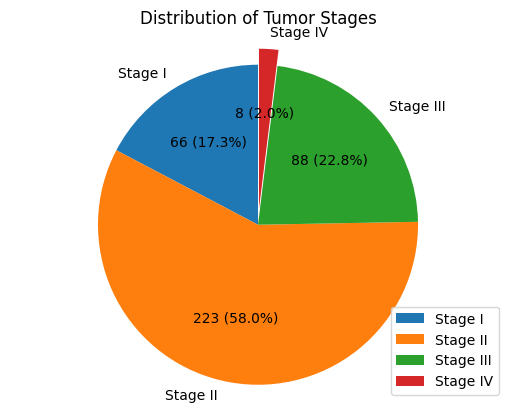

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have calculated sizes for each stage
labels = ['Stage I', 'Stage II', 'Stage III', 'Stage IV']
sizes = [ tumor_I.shape[0], tumor_II.shape[0], tumor_III.shape[0], tumor_IV.shape[0]]
explode = (0, 0, 0,0.1)

fig1, ax1 = plt.subplots()
# Create the pie chart
wedges, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

# Add data values as text inside the pie chart
for i, (wedge, size) in enumerate(zip(wedges, sizes)):
    percentage = sizes[i] / sum(sizes) * 100
    autotexts[i].set_text(f'{size/2:.0f} ({percentage:.1f}%)')

ax1.axis('equal')

# Add a title
plt.title('Distribution of Tumor Stages')

# Add a legend
plt.legend(labels, loc="lower right")

plt.show()


In [35]:
data.dropna(subset=['AJCC_Stage_nature2012'], inplace=True)
data.dropna(subset=['_GENOMIC_ID_TCGA_BRCA_hMethyl450'], inplace=True)
data

,sampleID,AJCC_Stage_nature2012,_GENOMIC_ID_TCGA_BRCA_hMethyl450,sample_type
8,TCGA-A1-A0SB-01,Stage I,TCGA-A1-A0SB-01A-11D-A145-05,Primary Tumor
10,TCGA-A1-A0SE-01,Stage I,TCGA-A1-A0SE-01A-11D-A10P-05,Primary Tumor
11,TCGA-A1-A0SF-01,Stage IIA,TCGA-A1-A0SF-01A-11D-A145-05,Primary Tumor
12,TCGA-A1-A0SG-01,Stage IIB,TCGA-A1-A0SG-01A-11D-A145-05,Primary Tumor
13,TCGA-A1-A0SH-01,Stage IIA,TCGA-A1-A0SH-01A-11D-A10P-05,Primary Tumor
...,...,...,...,...
1122,TCGA-EW-A1PD-01,Stage IIA,TCGA-EW-A1PD-01A-11D-A145-05,Primary Tumor
1123,TCGA-EW-A1PE-01,Stage IIA,TCGA-EW-A1PE-01A-11D-A145-05,Primary Tumor
1124,TCGA-EW-A1PF-01,Stage IA,TCGA-EW-A1PF-01A-11D-A145-05,Primary Tumor
1125,TCGA-EW-A1PG-01,Stage IIB,TCGA-EW-A1PG-01A-11D-A145-05,Primary Tumor


In [36]:
print('tumor: ', tumor.shape)
print('normal: ', normal.shape)
print('tumor_I: ', tumor_I.shape)
print('tumor_II: ', tumor_II.shape)
print('tumor_III: ', tumor_III.shape)
print('tumor_IV: ', tumor_IV.shape)

tumor:  (1101, 4)
normal:  (139, 4)
tumor_I:  (133, 4)
tumor_II:  (446, 4)
tumor_III:  (175, 4)
tumor_IV:  (15, 4)


In [37]:
data.groupby('AJCC_Stage_nature2012').size()

AJCC_Stage_nature2012
Stage I        32
Stage IA       40
Stage IB        4
Stage II       32
Stage IIA     137
Stage IIB      93
Stage III      16
Stage IIIA     76
Stage IIIB     13
Stage IIIC     20
Stage IV        6
Stage X         1
dtype: int64

In [41]:
# iterate through all the files in the data/train
import os
import pandas as pd
train_list = [ filename for filename in os.listdir("../data/train")]

barcode = pd.read_csv("../result/jhu-usc.edu_BRCA.HumanMethylation450.1.11.0.sdrf.txt.csv")
barcode = barcode[barcode["Array Data File"].isin(train_list)]
barcode = barcode.rename(columns={"Comment [TCGA Barcode]": "_GENOMIC_ID_TCGA_BRCA_hMethyl450"})
barcode


,_GENOMIC_ID_TCGA_BRCA_hMethyl450,Array Data File
0,TCGA-A7-A0DC-01B-04D-A22R-05,7796806125_R03C02_Grn.idat
1,TCGA-A7-A0DC-01B-04D-A22R-05,7796806125_R03C02_Red.idat
702,TCGA-BH-A1FN-11A-34D-A13T-05,6026818108_R03C02_Grn.idat
703,TCGA-BH-A1FN-11A-34D-A13T-05,6026818108_R03C02_Red.idat
704,TCGA-A7-A13G-11A-51D-A13T-05,6026818135_R04C02_Grn.idat
...,...,...
1855,TCGA-PE-A5DC-01A-12D-A27Y-05,9298768172_R02C02_Red.idat
1856,TCGA-PE-A5DD-01A-12D-A27Y-05,9298768134_R06C01_Grn.idat
1857,TCGA-PE-A5DD-01A-12D-A27Y-05,9298768134_R06C01_Red.idat
1858,TCGA-PE-A5DE-01A-11D-A27Y-05,9298768134_R02C02_Grn.idat


In [42]:
joined_n = pd.merge(barcode, normal, on="_GENOMIC_ID_TCGA_BRCA_hMethyl450", how="inner")
joined_I = pd.merge(barcode, tumor_I, on="_GENOMIC_ID_TCGA_BRCA_hMethyl450", how="inner")
joined_II = pd.merge(barcode, tumor_II, on="_GENOMIC_ID_TCGA_BRCA_hMethyl450", how="inner")
joined_III = pd.merge(barcode, tumor_III, on="_GENOMIC_ID_TCGA_BRCA_hMethyl450", how="inner")

joined_stages = [joined_I, joined_II, joined_III]

In [43]:
joined_n

,_GENOMIC_ID_TCGA_BRCA_hMethyl450,Array Data File,sampleID,AJCC_Stage_nature2012,sample_type
0,TCGA-BH-A1FN-11A-34D-A13T-05,6026818108_R03C02_Grn.idat,TCGA-BH-A1FN-11,NaN,Solid Tissue Normal
1,TCGA-BH-A1FN-11A-34D-A13T-05,6026818108_R03C02_Red.idat,TCGA-BH-A1FN-11,NaN,Solid Tissue Normal
2,TCGA-A7-A13G-11A-51D-A13T-05,6026818135_R04C02_Grn.idat,TCGA-A7-A13G-11,NaN,Solid Tissue Normal
3,TCGA-A7-A13G-11A-51D-A13T-05,6026818135_R04C02_Red.idat,TCGA-A7-A13G-11,NaN,Solid Tissue Normal
4,TCGA-BH-A1F6-11B-94D-A13T-05,6026818144_R05C02_Grn.idat,TCGA-BH-A1F6-11,NaN,Solid Tissue Normal
...,...,...,...,...,...
89,TCGA-AC-A2FF-11A-13D-A17F-05,6057833166_R01C01_Red.idat,TCGA-AC-A2FF-11,NaN,Solid Tissue Normal
90,TCGA-AC-A2FG-11A-22D-A17F-05,6057833166_R03C01_Grn.idat,TCGA-AC-A2FG-11,NaN,Solid Tissue Normal
91,TCGA-AC-A2FG-11A-22D-A17F-05,6057833166_R03C01_Red.idat,TCGA-AC-A2FG-11,NaN,Solid Tissue Normal
92,TCGA-AC-A2FM-11B-32D-A19Z-05,6285633051_R02C01_Grn.idat,TCGA-AC-A2FM-11,NaN,Solid Tissue Normal


In [44]:
print(joined_n.shape)
print(joined_I.shape)
print(joined_II.shape)
print(joined_III.shape)

(94, 5)
(22, 5)
(102, 5)
(44, 5)


### plot pie chart of champ normalized data of AJCC_Stage_nature2012 distribution

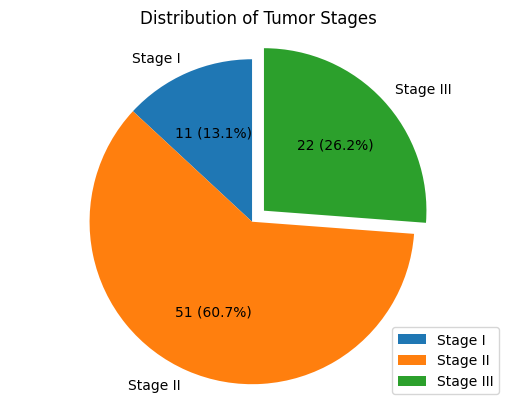

In [57]:
import matplotlib.pyplot as plt

# Assuming you have calculated sizes for each stage
labels = ['Stage I', 'Stage II', 'Stage III']
sizes = [joined_I.shape[0], joined_II.shape[0], joined_III.shape[0]]
explode = (0, 0, 0.1)

fig1, ax1 = plt.subplots()
# Create the pie chart
wedges, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

# Add data values as text inside the pie chart
for i, (wedge, size) in enumerate(zip(wedges, sizes)):
    percentage = sizes[i] / sum(sizes) * 100
    autotexts[i].set_text(f'{size/2:.0f} ({percentage:.1f}%)')

ax1.axis('equal')

# Add a title
plt.title('Distribution of Tumor Stages')

# Add a legend
plt.legend(labels, loc="lower right")

plt.show()


### save grouped data and organized in train folder

In [8]:
import shutil
import os
if not os.path.exists("../train"):
    os.mkdir("../train")
    
data_folders = ['stage_I', 'stage_II', 'stage_III']

for folder_name in data_folders:
    if not os.path.exists("../train/"+folder_name):
        os.mkdir("../train/"+folder_name)



In [9]:

for i in range(len(data_folders)):
    for filename in joined_n["Array Data File"]:
        shutil.copyfile("../data/train/"+filename, f"../train/{data_folders[i]}/"+filename)
    for filename in joined_stages[i]["Array Data File"]:
        shutil.copyfile("../data/train/"+filename, f"../train/{data_folders[i]}/"+filename)


In [10]:
import pandas as pd
import re

# Assuming you have already sorted and filtered your data
# joined_stages[i] and joined_n are your dataframes containing stage I and normal samples

# Create a new dataframe for the sample sheet
for i in range(len(data_folders)):
    sample_sheet_data = pd.DataFrame(columns=['Sample_Name', 'Sample_Plate', 'Sample_Group', 'Pool_ID', 'Sentrix_ID', 'Sentrix_Position'])

    # Populate the sample sheet data from joined_stages[i] (Stage I)
    sample_sheet_data['Sample_Name'] = range(1, len(joined_stages[i]) + 1)
    sample_sheet_data['Sample_Plate'] = ''
    sample_sheet_data['Sample_Group'] = data_folders[i]
    sample_sheet_data['Pool_ID'] = ''
    sample_sheet_data['Sentrix_ID'] = joined_stages[i]['Array Data File'].apply(lambda x: re.search(r'(\d+)_', x).group(1))
    sample_sheet_data['Sentrix_Position'] = joined_stages[i]['Array Data File'].apply(lambda x: re.search(r'_(\w+)_', x).group(1))

    # Append the sample sheet data from joined_n (Normal)
    normal_data = pd.DataFrame({'Sample_Name': range(len(joined_stages[i]) + 1, len(joined_stages[i]) + len(joined_n) + 1),
                                'Sample_Plate': '',
                                'Sample_Group': 'Normal',
                                'Pool_ID': '',
                                'Sentrix_ID': joined_n['Array Data File'].apply(lambda x: re.search(r'(\d+)_', x).group(1)),
                                'Sentrix_Position': joined_n['Array Data File'].apply(lambda x: re.search(r'_(\w+)_', x).group(1))})


    sample_sheet_data = sample_sheet_data.append(normal_data, ignore_index=True)

    # Define the custom header
    custom_header = [
        "[Header]",
        "Investigator Name",
        "Project Name,DNA Methylation 450k",
        "Experiment Name",
        "Date,16-Mar-21",
        "",
        "[Data]",
    ]

    sample_sheet_data.to_csv("sample_sheettmp.csv", index=False)
    # Save the data to a CSV file with the custom header
    with open(f'../train/{data_folders[i]}/sample_sheet.csv', 'w') as f:
        for line in custom_header:
            f.write(line + "\n")
        with open('sample_sheettmp.csv', 'r') as f1:
            for line in f1:
                f.write(line)



C:\Users\Vincent\AppData\Local\Temp\ipykernel_12496\3569289480.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_sheet_data = sample_sheet_data.append(normal_data, ignore_index=True)
C:\Users\Vincent\AppData\Local\Temp\ipykernel_12496\3569289480.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_sheet_data = sample_sheet_data.append(normal_data, ignore_index=True)
C:\Users\Vincent\AppData\Local\Temp\ipykernel_12496\3569289480.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_sheet_data = sample_sheet_data.append(normal_data, ignore_index=True)
